# Example for a matrix

The following example will show what matrices and vectors are good for. _The python code is not important._ You will get to know these and other commands in the course of this module.

We are going to start with a picture. 

A comment for all of you who have some experience with programming in python: Most of the code you will see is not elegant or efficient but it does the job and is "easy" to read for beginners.  

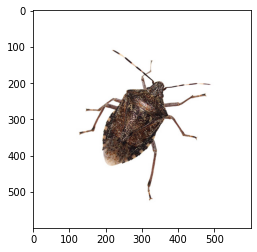

In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import rescale
img = mpimg.imread('stinkbug4.JPG')
plt.imshow(img)

This is a stinkbug, so hopefully no one is offended with what I'm going to do with the bug (or at least the picture of it).

If you open the picture with an image viewer, you can enlarge or reduce the picture or rotate it. Now the important question: What's going on behind the scene if you do rotate the picture? Or in other words: What does the computer do to achieve the rotation? 

One simple solution is using a matrix and vectors. 

The simplify the procedure, we prepare the bug. Again, ignore the python code.

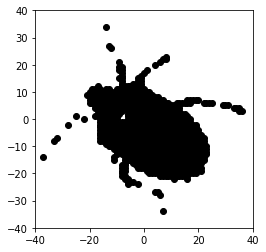

In [2]:
img = rescale(img, .2)

img = np.delete(img,np.arange(20), axis=0)
img = np.delete(img,np.arange(80,100), axis=0)
img = np.delete(img,np.arange(20), axis=1)
img = np.delete(img,np.arange(80,100), axis=1)

col =np.zeros(img.shape[0]*img.shape[1])

k = 0
for i in np.arange(img.shape[0]):
    for j in np.arange(img.shape[1]):
        col[k] = np.round(.99*img[i,j,:],0)
        k = k+1
        
image = np.array([np.repeat(np.arange(img.shape[0]),img.shape[1]), np.tile(np.arange(img.shape[1]),img.shape[0])]).T
image[:,0] = image[:,0] - 40
image[:,1] = image[:,1] - 40

image = image[col==0,:]


plt.plot(image[:,0],image[:,1],"o",color="black")
plt.axis('square')
plt.xlim(-40,40)
plt.ylim(-40,40)
plt.savefig("bug01.eps",bbox_inches="tight")

The picture has been greatly simplified, but that doesn't change the principle of image processing. Important, we have now a dataframe _image_, which consists of the coordinates of the black points.

In [6]:
print(image)
image.size

[[-37 -14]
 [-33  -8]
 [-32  -7]
 ...
 [ 35   3]
 [ 35   4]
 [ 36   3]]


2162

The first entry in the array (which you will get to know soon) is [-37,-14] and this corresponds to the coordinates (-37,-14) of the black point on the far left side.

Now, we define a matrix like you have seen in the introduction slides.

In [4]:
a_11 = .5
a_12 = 1
a_21 = 0
a_22 = 1

A = np.array([[a_11,a_12],[a_21,a_22]])
A

array([[0.5, 1. ],
       [0. , 1. ]])

We can take the coordinates of a black point and create a vector:

In [10]:
b = np.array([-37,-14])
b

array([-37, -14])

We now multiply the matrix A with the vector b:

In [12]:
c = np.matmul(A, b)
c

array([-32.5, -14. ])

The matrix $A$ transforms a vector $b$ into a vector $c$. In this case, the point (-37, -14) is moved to the point (-32.5, -14). The reason why this is so will be part of this module. But for now, let's leave the details. 

Now, we want transform _all_ black points with the matrix $A$. That's what the following code does. Again, forget what the code looks like except the two lines in the for-loop:

    b = np.array([image[k,0],image[k,1]])
    c = np.matmul(A,b)
    
These commands transform the coordinates of the black points. 

(-40.0, 40.0)

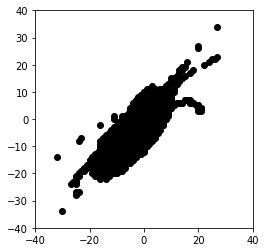

In [5]:
image_mat = np.copy(image)

for k in np.arange(image.shape[0]):
    b = np.array([image[k,0],image[k,1]])
    c = np.matmul(A,b)
    image_mat[k, 0] = c[0]
    image_mat[k, 1] = c[1]

plt.plot(image_mat[:, 0], image_mat[:, 1],"o",color="black")
plt.axis('square')
plt.xlim(-40,40)
plt.ylim(-40,40)

The original bug is rotated and stretched. Now let's play around with the values in the matrix. Before we do that, we define a plot-function, so that you don't see the same code over and over again.

In [7]:
def plot(A):
    image_mat = np.copy(image)

    for k in np.arange(image.shape[0]):
        b = np.array([image[k, 0],image[k, 1]])
        c = np.matmul(A,b)
        image_mat[k, 0] = c[0]
        image_mat[k, 1] = c[1]

    plt.plot(image_mat[:, 0], image_mat[:, 1],"o",color="black")
    plt.axis('square')
    plt.xlim(-40,40)
    plt.ylim(-40,40)

[[1 0]
 [0 0]]


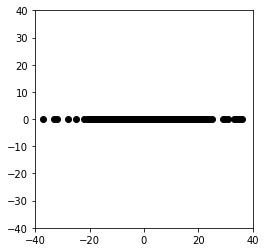

In [13]:
a_11 = 1
a_12 = 0
a_21 = 0
a_22 = 0

A = np.array([[a_11,a_12],[a_21,a_22]])
print(A)

plot(A)



In [14]:
im = image_mat / 10
np.savetxt("bugtxt3.txt",im, delimiter=" ")

That's the original bug. The matrix $\begin{bmatrix}1&0\\0&1\end{bmatrix}$ does "nothing".

[[1 0]
 [0 1]]


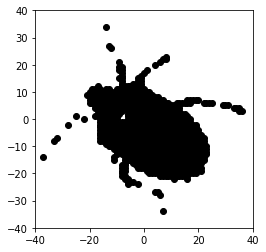

In [19]:
a_11 = 1
a_12 = 0
a_21 = 0
a_22 = 1

A = np.array([[a_11,a_12],[a_21,a_22]])
print(A)

plot(A)


The has been mirrored along the x axis. 

[[0.5 1. ]
 [1.  0.5]]


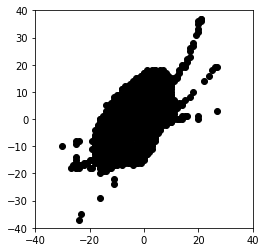

In [22]:
a_11 = 1/2
a_12 = 1
a_21 = 1
a_22 = 1/2

A = np.array([[a_11,a_12],[a_21,a_22]])
print(A)

plot(A)

The original bug has been enlarged by the factor 2.

We introduce now a special matrix, the rotation matrix. Again, forget the details, you will see them soon enough. We just want to show you, what different matrices do. 

[[ 0.34202014 -0.93969262]
 [ 0.93969262  0.34202014]]


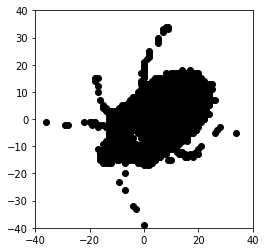

In [24]:
deg = 70

A = np.array([[np.cos(np.radians(deg)), -np.sin(np.radians(deg))],[np.sin(np.radians(deg)),np.cos(np.radians(deg))]])

print(A)

plot(A)

The matrix $\begin{bmatrix}0.866&-0.5\\0.5&0.866\end{bmatrix}$ rotates the bug by 30 degrees counterclockwise.